<a id="dataset-analysis"></a>
<p style="font-size:350%;text-align:center;font-weight:800">
    Blinkit Sales Analysis 📊<hr>

## Overview
This project analyzes Blinkit's sales data to uncover key insights about customer purchasing behavior, product performance, and sales trends. Using Python, Pandas, Matplotlib, and Seaborn, we perform exploratory data analysis (EDA) to understand trends in sales, product categories, payment methods, and delivery performance.

## Key Objectives
- **Understand Sales Trends**: Analyze total sales over time and identify peak seasons.
- **Identify Best-Selling Products**: Determine the most popular product categories and top-selling items.
- **Analyze Customer Purchasing Behavior**: Determine the typical price range of most orders.
- **Assess Payment Preferences**: Determine the most commonly used payment methods (UPI, Cash, etc.).
- **Evaluate Delivery Performance**: Analyze delivery efficiency and delays.

## Methodologies
1. **Data Collection & Preprocessing**:
   - Load datasets from CSV files.
   - Convert date columns to proper datetime format.
   - Handle missing values by removing incomplete records.

2. **Exploratory Data Analysis (EDA)**:
   - Generate summary statistics for key numerical columns.
   - Visualize order total distribution using histograms.
   - Identify top-selling product categories using bar charts.
   - Analyze sales trends with time-series plots.

3. **Customer & Payment Analysis**:
   - Evaluate customer preferences for payment methods.
   - Identify trends in order values and repeat purchases.

4. **Delivery Performance Evaluation**:
   - Calculate delivery delays by comparing actual and promised delivery times.
   - Visualize the distribution of delivery delays using histograms.

## Conclusion
This analysis provides insights into sales patterns, customer behavior, and operational efficiency, helping Blinkit optimize their product offerings and improve customer satisfaction.


<hr>
<a id="dataset-analysis"></a>
<p style="font-size:250%;text-align:center;font-weight:800">
    📌 Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr>
<a id="dataset-analysis"></a>
<p style="font-size:250%;text-align:center;font-weight:800">
    📥 Loading Dataset

In [3]:
# Load datasets
df_products = pd.read_csv("BlinkIt Dataset/blinkit_products.csv")
df_orders = pd.read_csv("BlinkIt Dataset/blinkit_orders.csv")

In [4]:
# Display first few rows of products dataset
df_products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [5]:
# Display first few rows of orders dataset
df_orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


<hr>
<a id="dataset-analysis"></a>
<p style="font-size:250%;text-align:center;font-weight:800">
    🧼 Data Cleaning

In [23]:
# Convert date columns to datetime format
df_orders["order_date"] = pd.to_datetime(df_orders["order_date"])
df_orders["promised_delivery_time"] = pd.to_datetime(df_orders["promised_delivery_time"])
df_orders["actual_delivery_time"] = pd.to_datetime(df_orders["actual_delivery_time"])

# Check for missing values
df_products.isnull().sum()
df_orders.isnull().sum()

# Remove missing values
df_products.dropna(inplace=True)
df_orders.dropna(inplace=True)

<hr>
<a id="dataset-analysis"></a>
<p style="font-size:250%;text-align:center;font-weight:800">
    🔍 Exploratory Data Analysis (EDA)

In [29]:
# Basic products dataset information
df_products.info()

# Products summary statistics
df_products.describe()

# Display products column names
df_products.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')

In [30]:
# Basic orders dataset information
df_orders.info()

# Orders summary statistics
df_orders.describe()

# Display orders column names
df_orders.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 390.8+ KB


Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id'],
      dtype='object')

<hr>
<a id="dataset-analysis"></a>
<p style="font-size:200%;text-align:center;font-weight:600">
    📈 Sales Trend Over Time

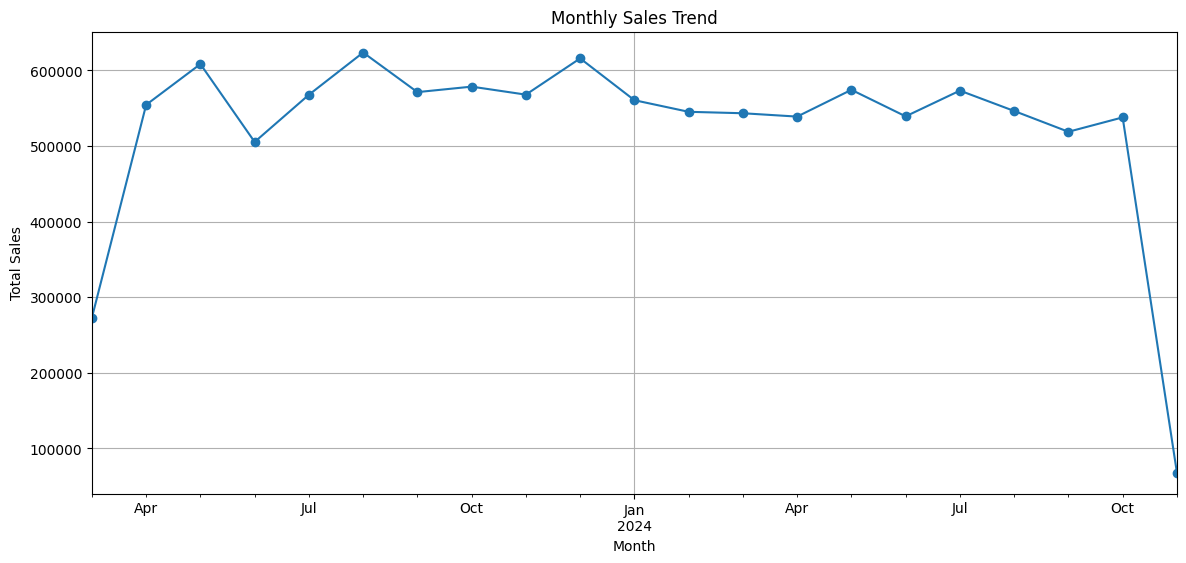

In [31]:
# Analyze total sales over time and identify peak seasons
df_orders["order_month"] = df_orders["order_date"].dt.to_period("M")
sales_trend = df_orders.groupby("order_month")["order_total"].sum()
plt.figure(figsize=(14, 6))
sales_trend.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

<hr>
<a id="dataset-analysis"></a>
<p style="font-size:200%;text-align:center;font-weight:600">
    📈 Top Selling Product Categories

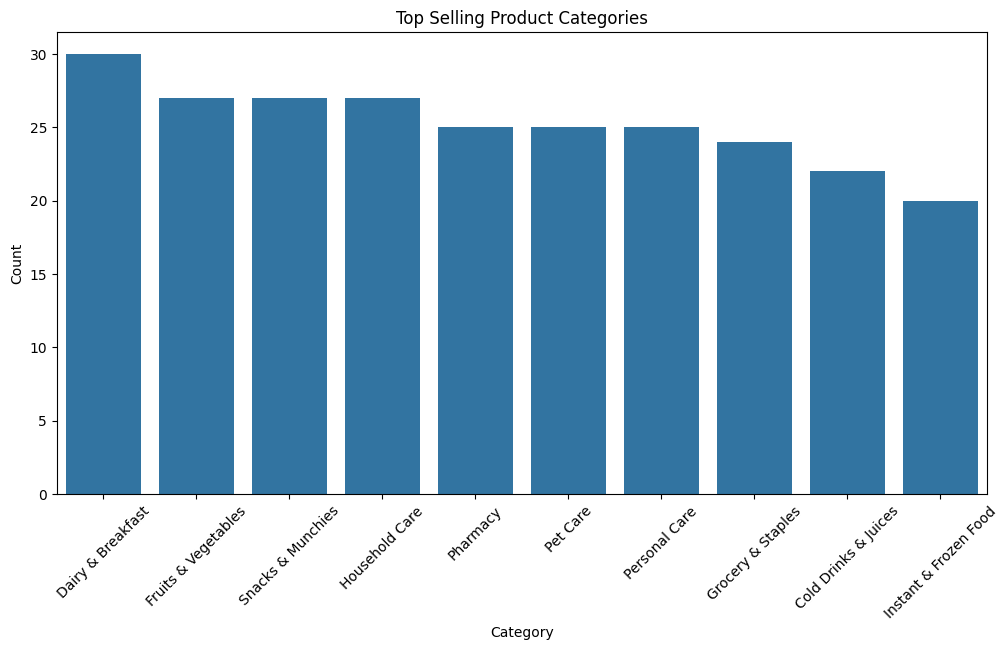

In [32]:
# Determine the most popular product categories and top-selling items
plt.figure(figsize=(12, 6))
top_categories = df_products["category"].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title("Top Selling Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

<hr>
<a id="dataset-analysis"></a>
<p style="font-size:200%;text-align:center;font-weight:600">
    📈 Price Range of Most Orders

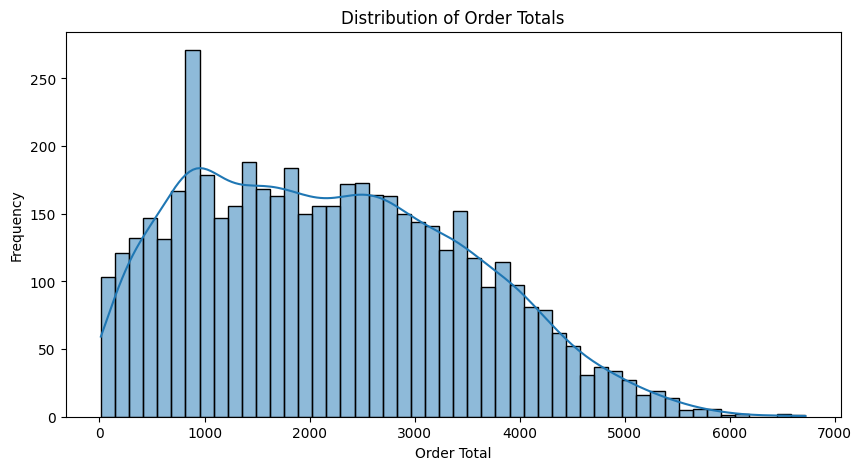

In [33]:
# Determine the typical price range of most orders
plt.figure(figsize=(10, 5))
sns.histplot(df_orders["order_total"], bins=50, kde=True)
plt.title("Distribution of Order Totals")
plt.xlabel("Order Total")
plt.ylabel("Frequency")
plt.show()

<hr>
<a id="dataset-analysis"></a>
<p style="font-size:200%;text-align:center;font-weight:600">
    📈 Payment Method Distribution

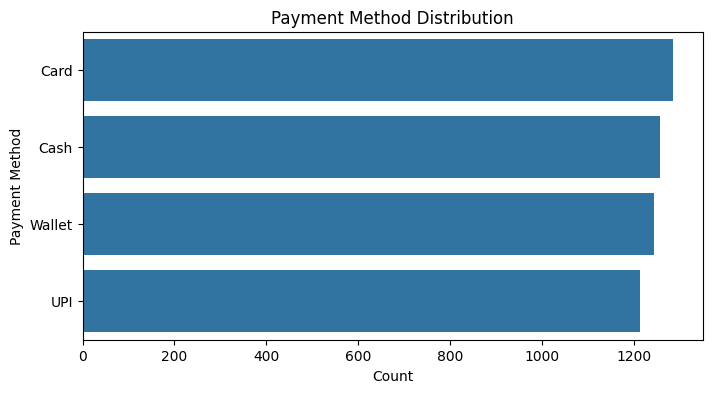

In [34]:
# Determine the most commonly used payment methods (UPI, Cash, etc.)
plt.figure(figsize=(8, 4))
sns.countplot(y=df_orders["payment_method"], order=df_orders["payment_method"].value_counts().index)
plt.title("Payment Method Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()

<hr>
<a id="dataset-analysis"></a>
<p style="font-size:200%;text-align:center;font-weight:600">
    📈 Delivery Performance Analysis

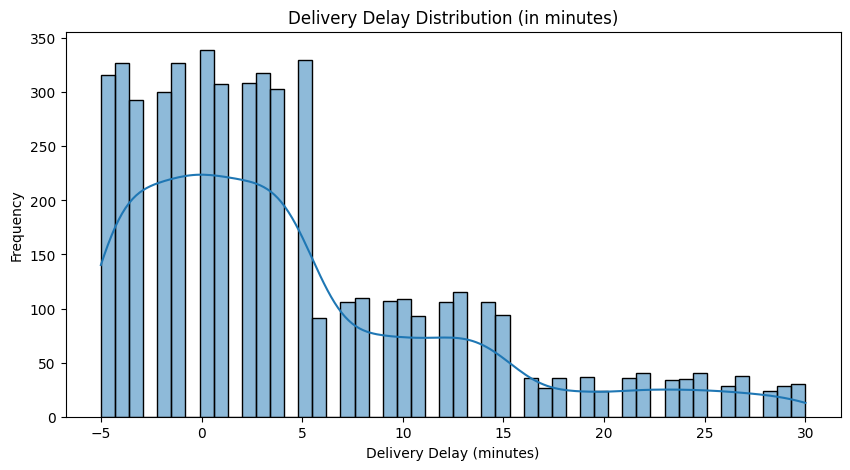

In [35]:
# Analyze delivery efficiency and delays
df_orders["delivery_delay"] = (df_orders["actual_delivery_time"] - df_orders["promised_delivery_time"]).dt.total_seconds() / 60
plt.figure(figsize=(10, 5))
sns.histplot(df_orders["delivery_delay"], bins=50, kde=True)
plt.title("Delivery Delay Distribution (in minutes)")
plt.xlabel("Delivery Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

**Key Insights:**
  - Most orders are within the price range of normal daily essentials.
  - The top-selling product categories indicate customer preferences.
  - Sales trends show peak months for purchases.
  - Most customers prefer UPI and Cash payments.
  - Delivery performance insights highlight efficiency and delays.